In [4]:
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Convolution
from scipy.ndimage import convolve, generate_binary_structure

# Geometry
h = np.zeros([80, 440])
lhead = 105
rhead = 80

# Left head
h[0,0:200]= lhead
# Right head
h[0,241:439]= rhead

# Error and tolerance
tolerance = 1.E-9
error = 1.0
step = 0

# Residual
residual = np.zeros([80, 440])

(nrows, ncols) = h.shape

while error > tolerance:
    step = step + 1
    # Copy the FDM grid to residual
    residual = h.copy()
    
    # Finite Difference Method
    for i in range(1, nrows - 1):
        for j in range(1, ncols - 1):
             h[i, j] = (h[i-1, j] + h[i, j-1] + 
                        h[i, j+1] + h[i+1, j]) / 4

    # Top left side of dam boundary assign head
    # if i == 0 and j < 202:
    h[0,:200] = lhead
                
    # Top right side of dam boundary assign head
    # elif i == 0 and j > 240:
    h[0, 241:]= rhead
    
    # Top boundary beneath the dam
    for j in range(201, 240):
        h[0,j] = (h[0, j-1]+ h[0, j+1] + 2 * h[1, j]) / 4;

    # Bottom boundary
    for j in range(1, (ncols-1)):
        h[(nrows -1), j] = (h[(nrows-1), j-1] + h[(nrows-1), j+1] +
                            2 * h[nrows-2, j]) / 4

    # Left boundary
    for i in range(1, (nrows-1)):
        h[i, 0] = (h[i-1, 0] + h[i+1, 0]+ 2 * h[i, 1]) / 4
        
    # Right boundary
    for i in range(1, (nrows-1)):
        h[i, (ncols -1)] = (2 * h[i, (ncols-2)] + 
                                h[i-1, (ncols-1)] + 
                                h[i+1, (ncols-1)]) / 4
        
    # Left bottom corner (i == (nrows -1) and j == 0):
    # h[i,j]=(h[i-1,j]+h[i,j+1])/2
    h[(nrows-1), 0] = (h[nrows-2, 0] + h[(nrows-1), 1]) / 2
    
                
    # Right bottom corner (i == (nrows -1) and  j == (ncols -1))
    # h[i,j]=(h[i,j-1]+h[i-1,j])/2
    h[(nrows-1), (ncols-1)] = (h[(nrows-1), (ncols-2)] + 
                               h[(nrows-2), (ncols-1)]) / 2
    
                
    error = (np.square(np.subtract(h, residual))).sum()
    print(step, error)

1 441162.3439179171
2 120728.56713762808
3 55727.220940805724
4 33259.16054156282
5 22710.46696218651
6 16793.04764861793
7 13082.137653508606
8 10572.456611976775
9 8780.30532250508
10 7446.94524608182
11 6422.611023009329
12 5615.159407848457
13 4965.074545665221
14 4432.358972823591
15 3989.2305845227925
16 3615.846185361165
17 3297.6902100450393
18 3023.9222601349015
19 2786.2986653327926
20 2578.449492031555
21 2395.382242459911
22 2233.1339415784996
23 2088.5226306013465
24 1958.9668483698492
25 1842.3524879201739
26 1736.9332273999112
27 1641.255123334071
28 1554.0988386704232
29 1474.434908389865
30 1401.3887589450321
31 1334.2131052716754
32 1272.265984990406
33 1214.9931408230334
34 1161.9137866064193
35 1112.6090279973537
36 1066.7123820655063
37 1023.9019683550657
38 983.8940400947456
39 946.4375967976606
40 911.309874729554
41 878.3125540986971
42 847.268554565967
43 818.0193161516657
44 790.4224825697311
45 764.3499197447192
46 739.6860147316963
47 716.3262101955108
48 69

376 32.96939493388746
377 32.84175971227787
378 32.71495917942225
379 32.588985666145554
380 32.46383159417627
381 32.33948947483628
382 32.215951907751815
383 32.09321157958614
384 31.971261262793988
385 31.85009381439733
386 31.7297021747808
387 31.610079366508963
388 31.491218493160762
389 31.37311273818662
390 31.255755363782054
391 31.139139709781123
392 31.023259192568002
393 30.908107304006528
394 30.793677610387174
395 30.67996375139227
396 30.566959439076292
397 30.454658456865157
398 30.343054658570054
399 30.232141967418084
400 30.121914375098516
401 30.012365940824647
402 29.903490790410356
403 29.795283115362068
404 29.687737171985056
405 29.580847280503885
406 29.474607824197168
407 29.369013248546324
408 29.26405806039753
409 29.159736827136634
410 29.056044175877805
411 28.952974792665437
412 28.850523421687075
413 28.748684864499616
414 28.64745397926826
415 28.546825680015655
416 28.44679493588538
417 28.34735677041345
418 28.24850626081441
419 28.150238537276657
420 

739 12.414788085746274
740 12.391278830581475
741 12.367852743087989
742 12.344509446753976
743 12.32124856724676
744 12.298069732396453
745 12.27497257218007
746 12.2519567187056
747 12.229021806195862
748 12.206167470973327
749 12.183393351444588
750 12.16069908808438
751 12.138084323421273
752 12.115548702021746
753 12.093091870475845
754 12.070713477382064
755 12.048413173332511
756 12.02619061089886
757 12.004045444617208
758 11.98197733097445
759 11.9599859283937
760 11.938070897220417
761 11.91623189970818
762 11.894468600005371
763 11.872780664140938
764 11.851167760011453
765 11.829629557367106
766 11.808165727798507
767 11.786775944723784
768 11.765459883375033
769 11.744217220785831
770 11.723047635777888
771 11.701950808948725
772 11.680926422658555
773 11.659974161018031
774 11.639093709876054
775 11.618284756807135
776 11.597546991098838
777 11.576880103740642
778 11.55628378741097
779 11.535757736465792
780 11.515301646926869
781 11.494915216469801
782 11.47459814441267


1105 7.358277855796402
1106 7.350559191092002
1107 7.342860612779254
1108 7.335182050963895
1109 7.327523436021397
1110 7.319884698595315
1111 7.312265769596189
1112 7.304666580200374
1113 7.297087061848986
1114 7.289527146246657
1115 7.281986765360285
1116 7.274465851418121
1117 7.266964336908284
1118 7.259482154578055
1119 7.252019237432434
1120 7.244575518733216
1121 7.237150931997586
1122 7.229745410997184
1123 7.222358889757156
1124 7.2149913025548384
1125 7.20764258391873
1126 7.200312668627351
1127 7.193001491708267
1128 7.185708988436927
1129 7.178435094335684
1130 7.171179745172505
1131 7.1639428769602365
1132 7.156724425955305
1133 7.149524328656814
1134 7.142342521805353
1135 7.135178942382123
1136 7.128033527607784
1137 7.120906214941425
1138 7.113796942079653
1139 7.106705646955486
1140 7.0996322677374195
1141 7.092576742828196
1142 7.085539010864126
1143 7.078519010713928
1144 7.07151668147782
1145 7.064531962486216
1146 7.057564793299236
1147 7.050615113705375
1148 7.043

1462 5.490322751286711
1463 5.486785743007246
1464 5.4832549528497445
1465 5.479730361652674
1466 5.476211950320974
1467 5.472699699825776
1468 5.469193591204335
1469 5.465693605559676
1470 5.46219972406016
1471 5.458711927939652
1472 5.455230198497011
1473 5.451754517095899
1474 5.448284865164551
1475 5.444821224195582
1476 5.441363575745686
1477 5.437911901435452
1478 5.434466182949107
1479 5.4310264020344965
1480 5.427592540502361
1481 5.424164580226534
1482 5.42074250314366
1483 5.417326291252842
1484 5.413915926615428
1485 5.410511391354855
1486 5.407112667656391
1487 5.40371973776703
1488 5.400332583995022
1489 5.396951188709813
1490 5.393575534341712
1491 5.390205603382025
1492 5.386841378382336
1493 5.383482841954516
1494 5.3801299767706485
1495 5.376782765562675
1496 5.373441191121986
1497 5.370105236299547
1498 5.366774884005619
1499 5.36345011720928
1500 5.360130918938446
1501 5.356817272279704
1502 5.3535091603779446
1503 5.350206566436146
1504 5.346909473715392
1505 5.3436

1818 4.515849743050125
1819 4.513687064006459
1820 4.511526653661969
1821 4.509368506281425
1822 4.507212616148275
1823 4.50505897756492
1824 4.50290758485243
1825 4.500758432350677
1826 4.498611514418074
1827 4.496466825431638
1828 4.494324359786924
1829 4.492184111897844
1830 4.49004607619674
1831 4.487910247134359
1832 4.485776619179479
1833 4.483645186819247
1834 4.481515944558822
1835 4.479388886921517
1836 4.477264008448558
1837 4.475141303699199
1838 4.4730207672505
1839 4.4709023936973
1840 4.468786177652377
1841 4.466672113745872
1842 4.4645601966258655
1843 4.462450420957805
1844 4.460342781424825
1845 4.458237272727327
1846 4.456133889583101
1847 4.454032626727505
1848 4.45193347891286
1849 4.449836440908908
1850 4.4477415075023945
1851 4.445648673497214
1852 4.443557933714342
1853 4.441469282991622
1854 4.439382716183924
1855 4.437298228162823
1856 4.435215813816764
1857 4.433135468051017
1858 4.431057185787416
1859 4.428980961964366
1860 4.426906791537073
1861 4.4248346694

2174 3.8564624293881358
2175 3.8548516460462205
2176 3.8532419164062826
2177 3.8516332386183203
2178 3.850025610837709
2179 3.848419031225501
2180 3.8468134979482724
2181 3.8452090091781503
2182 3.8436055630927513
2183 3.842003157875319
2184 3.8404017917142528
2185 3.8388014628038283
2186 3.837202169343392
2187 3.8356039095379297
2188 3.834006681597807
2189 3.8324104837387156
2190 3.830815314181717
2191 3.82922117115328
2192 3.827628052885175
2193 3.8260359576144736
2194 3.824444883583526
2195 3.822854829040022
2196 3.8212657922369067
2197 3.8196777714322696
2198 3.818090764889556
2199 3.8165047708773407
2200 3.8149197876693695
2201 3.8133358135446924
2202 3.811752846787298
2203 3.810170885686482
2204 3.8085899285366933
2205 3.8070099736373213
2206 3.805431019292897
2207 3.803853063813105
2208 3.8022761055126146
2209 3.8007001427111575
2210 3.7991251737334224
2211 3.7975511969091755
2212 3.7959782105731312
2213 3.794406213064997
2214 3.792835202729345
2215 3.791265177915775
2216 3.7896

2527 3.3427331245024536
2528 3.341410394420804
2529 3.3400883083199027
2530 3.338766865509914
2531 3.3374460653029363
2532 3.336125907012551
2533 3.334806389954102
2534 3.333487513444843
2535 3.332169276803524
2536 3.3308516793506677
2537 3.3295347204085717
2538 3.328218399301046
2539 3.3269027153538038
2540 3.3255876678941063
2541 3.3242732562509283
2542 3.322959479754923
2543 3.321646337738431
2544 3.3203338295354197
2545 3.319021954481447
2546 3.317710711913929
2547 3.3164001011716637
2548 3.315090121595352
2549 3.313780772527095
2550 3.3124720533108167
2551 3.3111639632918557
2552 3.309856501817444
2553 3.308549668236207
2554 3.307243461898371
2555 3.3059378821559866
2556 3.3046329283624316
2557 3.3033285998728985
2558 3.302024896044047
2559 3.300721816234084
2560 3.299419359802956
2561 3.298117526111961
2562 3.2968163145242224
2563 3.2955157244042192
2564 3.294215755118059
2565 3.292916406033397
2566 3.2916176765195115
2567 3.290319565947065
2568 3.2890220736883946
2569 3.28772519

2878 2.9139579889225917
2879 2.9128285030792607
2880 2.911699494930951
2881 2.910570964154891
2882 2.9094429104286057
2883 2.908315333430462
2884 2.9071882328392946
2885 2.90606160833452
2886 2.9049354595960186
2887 2.9038097863044396
2888 2.902684588140887
2889 2.9015598647869654
2890 2.9004356159249136
2891 2.8993118412375902
2892 2.898188540408397
2893 2.897065713121102
2894 2.895943359060267
2895 2.8948214779108943
2896 2.893700069358598
2897 2.8925791330895314
2898 2.891458668790321
2899 2.890338676148207
2900 2.889219154850968
2901 2.888100104586963
2902 2.8869815250450004
2903 2.8858634159145145
2904 2.8847457768854303
2905 2.883628607648272
2906 2.8825119078940276
2907 2.8813956773142815
2908 2.8802799156011014
2909 2.8791646224470773
2910 2.878049797545469
2911 2.8769354405898846
2912 2.8758215512745156
2913 2.8747081292941177
2914 2.8735951743439703
2915 2.872482686119838
2916 2.8713706643179915
2917 2.87025910863533
2918 2.8691480187691374
2919 2.868037394417252
2920 2.86692

3231 2.5428834485086567
3232 2.5419058349340187
3233 2.5409286112907377
3234 2.5399517773839526
3235 2.5389753330191196
3236 2.537999278001971
3237 2.537023612138305
3238 2.5360483352343444
3239 2.5350734470963046
3240 2.5340989475307802
3241 2.5331248363445162
3242 2.532151113344424
3243 2.5311777783377414
3244 2.530204831131771
3245 2.52923227153414
3246 2.5282600993526856
3247 2.5272883143953093
3248 2.526316916470398
3249 2.5253459053862453
3250 2.524375280951591
3251 2.523405042975217
3252 2.5224351912661884
3253 2.5214657256337354
3254 2.52049664588738
3255 2.519527951836773
3256 2.5185596432917556
3257 2.517591720062479
3258 2.516624181959211
3259 2.5156570287924067
3260 2.5146902603727717
3261 2.513723876511229
3262 2.5127578770188737
3263 2.5117922617069546
3264 2.51082703038701
3265 2.5098621828707333
3266 2.508897718970073
3267 2.5079336384970436
3268 2.5069699412640034
3269 2.506006627083453
3270 2.505043695768062
3271 2.504081147130766
3272 2.5031189809845675
3273 2.502157

3580 2.22411949586253
3581 2.223267391155359
3582 2.222415618576808
3583 2.221564177983919
3584 2.2207130692339296
3585 2.2198622921840765
3586 2.2190118466917306
3587 2.2181617326144276
3588 2.217311949809644
3589 2.216462498135132
3590 2.215613377448659
3591 2.2147645876080624
3592 2.2139161284713906
3593 2.213067999896634
3594 2.212220201742049
3595 2.2113727338659146
3596 2.210525596126514
3597 2.209678788382372
3598 2.208832310492075
3599 2.2079861623142527
3600 2.2071403437076773
3601 2.2062948545312877
3602 2.205449694643952
3603 2.2046048639047524
3604 2.2037603621728503
3605 2.2029161893074773
3606 2.202072345168052
3607 2.201228829614007
3608 2.20038564250484
3609 2.199542783700148
3610 2.1987002530597914
3611 2.1978580504435303
3612 2.1970161757113282
3613 2.1961746287231096
3614 2.195333409339151
3615 2.194492517419574
3616 2.193651952824688
3617 2.1928117154149462
3618 2.191971805050799
3619 2.1911322215928366
3620 2.190292964901861
3621 2.189454034838495
3622 2.1886154312

3931 1.9444663839525507
3932 1.9437227034654176
3933 1.9429793100965527
3934 1.9422362037299652
3935 1.9414933842499744
3936 1.9407508515409133
3937 1.9400086054870296
3938 1.9392666459728563
3939 1.9385249728828295
3940 1.9377835861014336
3941 1.9370424855133455
3942 1.9363016710031238
3943 1.935561142455556
3944 1.934820899755423
3945 1.9340809427874917
3946 1.9333412714366909
3947 1.9326018855879799
3948 1.9318627851263699
3949 1.931123969936883
3950 1.9303854399047282
3951 1.9296471949149907
3952 1.928909234852996
3953 1.9281715596040498
3954 1.9274341690534984
3955 1.9266970630867106
3956 1.9259602415892145
3957 1.9252237044465876
3958 1.9244874515442867
3959 1.9237514827681286
3960 1.9230157980037252
3961 1.9222803971369036
3962 1.9215452800534463
3963 1.9208104466393232
3964 1.9200758967803901
3965 1.9193416303626556
3966 1.9186076472722196
3967 1.9178739473951962
3968 1.9171405306177762
3969 1.9164073968261797
3970 1.9156745459066449
3971 1.9149419777455636
3972 1.9142096922294

4278 1.7028787588480836
4279 1.702228133899157
4280 1.7015777590805072
4281 1.7009276342937714
4282 1.7002777594407867
4283 1.699628134423419
4284 1.6989787591434562
4285 1.6983296335028104
4286 1.697680757403506
4287 1.697032130747467
4288 1.696383753436809
4289 1.6957356253734837
4290 1.6950877464597816
4291 1.6944401165977583
4292 1.6937927356897005
4293 1.6931456036378174
4294 1.6924987203443882
4295 1.6918520857118027
4296 1.6912056996424236
4297 1.6905595620386815
4298 1.6899136728030182
4299 1.6892680318379976
4300 1.688622639046169
4301 1.6879774943300554
4302 1.6873325975923699
4303 1.686687948735773
4304 1.6860435476630657
4305 1.685399394276832
4306 1.6847554884800817
4307 1.6841118301755582
4308 1.6834684192661817
4309 1.682825255654873
4310 1.6821823392446538
4311 1.681539669938549
4312 1.6808972476395556
4313 1.6802550722508525
4314 1.6796131436756023
4315 1.6789714618168947
4316 1.6783300265781107
4317 1.6776888378623838
4318 1.677047895573135
4319 1.6764071996137184
432

4626 1.4909041920083728
4627 1.49033496392951
4628 1.4897659542065593
4629 1.4891971627548337
4630 1.4886285894894546
4631 1.488060234325776
4632 1.4874920971790828
4633 1.4869241779646793
4634 1.4863564765979405
4635 1.4857889929942159
4636 1.4852217270691372
4637 1.4846546787379238
4638 1.4840878479163206
4639 1.4835212345197157
4640 1.482954838463779
4641 1.4823886596640354
4642 1.4818226980362206
4643 1.4812569534959312
4644 1.4806914259590025
4645 1.4801261153411385
4646 1.4795610215580093
4647 1.4789961445255786
4648 1.4784314841596773
4649 1.477867040376183
4650 1.4773028130909083
4651 1.4767388022200199
4652 1.47617500767936
4653 1.475611429384991
4654 1.4750480672529687
4655 1.4744849211994469
4656 1.4739219911404677
4657 1.4733592769922847
4658 1.4727967786709946
4659 1.472234496092948
4660 1.4716724291742809
4661 1.4711105778314226
4662 1.4705489419806248
4663 1.4699875215382445
4664 1.4694263164207726
4665 1.468865326544587
4666 1.4683045518261368
4667 1.4677439921819881
46

4976 1.3044302729607584
4977 1.3039325257568743
4978 1.3034349692299851
4979 1.3029376033064786
4980 1.3024404279127835
4981 1.3019434429752328
4982 1.3014466484203202
4983 1.3009500441744497
4984 1.3004536301641654
4985 1.299957406316016
4986 1.2994613725564514
4987 1.2989655288121655
4988 1.2984698750097121
4989 1.2979744110757223
4990 1.297479136936892
4991 1.29698405251992
4992 1.2964891577515336
4993 1.295994452558463
4994 1.2954999368675288
4995 1.2950056106055106
4996 1.2945114736992611
4997 1.2940175260756817
4998 1.2935237676616356
4999 1.293030198384121
5000 1.292536818170008
5001 1.2920436269463234
5002 1.2915506246401305
5003 1.2910578111783715
5004 1.290565186488218
5005 1.2900727504967444
5006 1.2895805031311036
5007 1.2890884443184176
5008 1.2885965739859024
5009 1.2881048920607285
5010 1.2876133984702156
5011 1.2871220931416287
5012 1.28663097600226
5013 1.2861400469794182
5014 1.2856493060004768
5015 1.2851587529928816
5016 1.2846683878840515
5017 1.2841782106013673
50

5321 1.1435390338432292
5322 1.143102890841788
5323 1.142666914758435
5324 1.1422311055289098
5325 1.1417954630889606
5326 1.1413599873742744
5327 1.1409246783207432
5328 1.1404895358640967
5329 1.1400545599402037
5330 1.1396197504849344
5331 1.1391851074341108
5332 1.13875063072381
5333 1.1383163202897508
5334 1.1378821760680173
5335 1.137448197994649
5336 1.1370143860055744
5337 1.1365807400368233
5338 1.1361472600245146
5339 1.1357139459046852
5340 1.1352807976135335
5341 1.1348478150870764
5342 1.1344149982615779
5343 1.1339823470731583
5344 1.1335498614580697
5345 1.1331175413525578
5346 1.1326853866928583
5347 1.1322533974152709
5348 1.1318215734561075
5349 1.131389914751721
5350 1.1309584212384296
5351 1.1305270928526625
5352 1.1300959295308395
5353 1.129664931209381
5354 1.1292340978247348
5355 1.1288034293133709
5356 1.1283729256118804
5357 1.12794258665676
5358 1.1275124123845264
5359 1.1270824027318094
5360 1.1266525576352606
5361 1.1262228770314344
5362 1.1257933608570125
5

5667 1.0021704449240647
5668 1.0017883848700055
5669 1.0014064709239088
5670 1.0010247030296504
5671 1.0006430811310674
5672 1.0002616051720221
5673 0.9998802750963506
5674 0.9994990908480799
5675 0.9991180523710739
5676 0.998737159609344
5677 0.9983564125068243
5678 0.9979758110075699
5679 0.9975953550555563
5680 0.9972150445948553
5681 0.9968348795695322
5682 0.9964548599236762
5683 0.996074985601429
5684 0.995695256546838
5685 0.9953156727041992
5686 0.9949362340175835
5687 0.9945569404311974
5688 0.9941777918893078
5689 0.9937987883361641
5690 0.9934199297159967
5691 0.9930412159730881
5692 0.9926626470517218
5693 0.99228422289632
5694 0.991905943451125
5695 0.9915278086605882
5696 0.991149818469116
5697 0.9907719728211059
5698 0.9903942716609608
5699 0.9900167149330928
5700 0.9896393025821466
5701 0.9892620345524106
5702 0.9888849107886322
5703 0.9885079312352102
5704 0.9881310958367591
5705 0.9877544045378104
5706 0.9873778572831099
5707 0.9870014540171532
5708 0.986625194684688


6011 0.8789959860444968
6012 0.8786610153190615
6013 0.8783261726106195
6014 0.8779914578700487
6015 0.8776568710481338
6016 0.8773224120958951
6017 0.8769880809641016
6018 0.8766538776037561
6019 0.8763198019657837
6020 0.8759858540011407
6021 0.8756520336608166
6022 0.8753183408958191
6023 0.8749847756571693
6024 0.8746513378958983
6025 0.8743180275631015
6026 0.8739848446097894
6027 0.8736517889871029
6028 0.8733188606461497
6029 0.8729860595380337
6030 0.872653385613974
6031 0.8723208388250634
6032 0.8719884191226148
6033 0.8716561264576543
6034 0.8713239607815576
6035 0.8709919220455723
6036 0.8706600102008684
6037 0.8703282251988017
6038 0.869996566990604
6039 0.8696650355277359
6040 0.8693336307614733
6041 0.8690023526431205
6042 0.8686712011240726
6043 0.8683401761558095
6044 0.8680092776896444
6045 0.8676785056770718
6046 0.8673478600695287
6047 0.8670173408185542
6048 0.8666869478755347
6049 0.8663566811920661
6050 0.8660265407195815
6051 0.8656965264097752
6052 0.86536663821

6359 0.7698244488501959
6360 0.7695311885923047
6361 0.769238040345822
6362 0.7689450040676966
6363 0.7686520797150728
6364 0.768359267244888
6365 0.768066566614377
6366 0.7677739777805437
6367 0.7674815007005632
6368 0.7671891353315237
6369 0.7668968816307038
6370 0.7666047395551483
6371 0.7663127090620935
6372 0.7660207901087255
6373 0.7657289826523024
6374 0.7654372866500447
6375 0.7651457020591768
6376 0.7648542288370767
6377 0.7645628669409095
6378 0.764271616328065
6379 0.7639804769557991
6380 0.7636894487814377
6381 0.7633985317624502
6382 0.7631077258560944
6383 0.7628170310198132
6384 0.7625264472109662
6385 0.7622359743870266
6386 0.7619456125054038
6387 0.7616553615235642
6388 0.7613652213989226
6389 0.7610751920890864
6390 0.7607852735514444
6391 0.7604954657435303
6392 0.7602057686229041
6393 0.7599161821471564
6394 0.7596267062737829
6395 0.759337340960422
6396 0.7590480861646229
6397 0.7587589418440497
6398 0.7584699079562972
6399 0.7581809844590602
6400 0.75789217130994

6705 0.6747572692349093
6706 0.67450031070873
6707 0.6742434502773119
6708 0.6739866879029125
6709 0.6737300235481534
6710 0.673473457175348
6711 0.6732169887470191
6712 0.6729606182255069
6713 0.6727043455734197
6714 0.6724481707532439
6715 0.6721920937274688
6716 0.6719361144585938
6717 0.6716802329091756
6718 0.6714244490417732
6719 0.6711687628190011
6720 0.6709131742033898
6721 0.6706576831575948
6722 0.6704022896441053
6723 0.6701469936257356
6724 0.6698917950649789
6725 0.6696366939245476
6726 0.6693816901670991
6727 0.6691267837553075
6728 0.6688719746519264
6729 0.668617262819608
6730 0.6683626482211299
6731 0.6681081308191863
6732 0.6678537105765721
6733 0.6675993874560354
6734 0.6673451614203968
6735 0.667091032432378
6736 0.6668370004549108
6737 0.6665830654507561
6738 0.6663292273827279
6739 0.666075486213768
6740 0.6658218419066964
6741 0.6655682944243669
6742 0.6653148437297379
6743 0.6650614897857297
6744 0.6648082325551895
6745 0.664555072001155
6746 0.6643020080865247

7049 0.591906019745662
7050 0.5916806825216997
7051 0.5914554312800967
7052 0.5912302659879882
7053 0.5910051866124207
7054 0.5907801931205691
7055 0.5905552854794807
7056 0.5903304636562966
7057 0.5901057276181269
7058 0.5898810773322135
7059 0.5896565127656522
7060 0.5894320338856485
7061 0.5892076406593711
7062 0.5889833330540696
7063 0.5887591110368896
7064 0.5885349745751406
7065 0.5883109236360045
7066 0.5880869581867941
7067 0.5878630781946843
7068 0.5876392836270965
7069 0.5874155744511691
7070 0.5871919506342864
7071 0.5869684121437618
7072 0.5867449589469493
7073 0.5865215910111563
7074 0.5862983083037147
7075 0.5860751107920378
7076 0.5858519984435252
7077 0.5856289712254866
7078 0.5854060291054336
7079 0.5851831720506755
7080 0.58496040002875
7081 0.5847377130070385
7082 0.5845151109529563
7083 0.5842925938340837
7084 0.5840701616178026
7085 0.5838478142716346
7086 0.583625551763151
7087 0.5834033740597707
7088 0.5831812811290905
7089 0.5829592729386133
7090 0.5827373494559

7392 0.5194459867599136
7393 0.5192482923012256
7394 0.5190506732442991
7395 0.5188531295602927
7396 0.5186556612203308
7397 0.5184582681956609
7398 0.5182609504573996
7399 0.5180637079767914
7400 0.5178665407250133
7401 0.517669448673276
7402 0.5174724317928285
7403 0.5172754900549232
7404 0.5170786234307276
7405 0.5168818318915485
7406 0.516685115408688
7407 0.51648847395341
7408 0.5162919074969969
7409 0.5160954160107398
7410 0.5158989994659706
7411 0.515702657834006
7412 0.5155063910862079
7413 0.5153101991939308
7414 0.515114082128489
7415 0.5149180398612399
7416 0.5147220723636459
7417 0.5145261796070195
7418 0.5143303615628166
7419 0.5141346182024368
7420 0.5139389494972886
7421 0.5137433554188359
7422 0.5135478359384756
7423 0.5133523910277393
7424 0.513157020658025
7425 0.5129617248008406
7426 0.5127665034276925
7427 0.5125713565100977
7428 0.5123762840195153
7429 0.5121812859274829
7430 0.5119863622055608
7431 0.5117915128252748
7432 0.511596737758216
7433 0.5114020369759164


7733 0.4562202098624597
7734 0.45604662527476186
7735 0.4558731068665688
7736 0.4556996546125331
7737 0.4555262684874171
7738 0.4553529484658073
7739 0.45517969452254925
7740 0.45500650663232406
7741 0.4548333847699225
7742 0.45466032891000446
7743 0.45448733902738786
7744 0.45431441509686477
7745 0.4541415570931349
7746 0.45396876499110106
7747 0.45379603876549046
7748 0.4536233783911186
7749 0.4534507838428391
7750 0.4532782550954487
7751 0.45310579212377944
7752 0.4529333949027387
7753 0.45276106340708555
7754 0.45258879761180054
7755 0.4524165974916362
7756 0.4522444630216019
7757 0.45207239417654577
7758 0.4519003909313475
7759 0.45172845326094785
7760 0.45155658114026204
7761 0.4513847745442536
7762 0.4512130334478538
7763 0.4510413578259781
7764 0.4508697476536741
7765 0.4506982029058074
7766 0.45052672355747003
7767 0.4503553095836085
7768 0.4501839609591884
7769 0.4500126776592731
7770 0.4498414596588531
7771 0.44967030693298937
7772 0.4494992194567212
7773 0.44932819720506906

8069 0.40146674668170573
8070 0.4013140331518388
8071 0.40116137782272665
8072 0.4010087806721966
8073 0.4008562416779926
8074 0.4007037608179127
8075 0.40055133806968507
8076 0.40039897341117037
8077 0.4002466668201058
8078 0.4000944182743467
8079 0.3999422277516912
8080 0.3997900952299313
8081 0.3996380206869393
8082 0.3994860041005547
8083 0.39933404544867335
8084 0.39918214470904906
8085 0.3990303018596116
8086 0.3988785168782444
8087 0.39872678974280884
8088 0.39857512043124943
8089 0.3984235089214081
8090 0.3982719551911771
8091 0.398120459218535
8092 0.3979690209813845
8093 0.39781764045766127
8094 0.3976663176253145
8095 0.3975150524622933
8096 0.3973638449465767
8097 0.39721269505611445
8098 0.39706160276886454
8099 0.3969105680628329
8100 0.396759590916043
8101 0.3966086713064783
8102 0.3964578092121097
8103 0.3963070046110285
8104 0.3961562574811889
8105 0.39600556780067886
8106 0.39585493554753404
8107 0.3957043606998233
8108 0.3955538432355903
8109 0.3954033831329072
8110 

8408 0.35289259209129864
8409 0.35275838751902355
8410 0.35262423407573007
8411 0.3524901317419157
8412 0.3523560804980258
8413 0.35222208032457036
8414 0.352088131202032
8415 0.3519542331108913
8416 0.3518203860316685
8417 0.3516865899449233
8418 0.35155284483109955
8419 0.3514191506707374
8420 0.35128550744446024
8421 0.35115191513273
8422 0.35101837371611655
8423 0.350884883175204
8424 0.35075144349054
8425 0.3506180546426857
8426 0.3504847166122462
8427 0.35035142937982144
8428 0.3502181929259724
8429 0.35008500723135116
8430 0.3499518722765006
8431 0.34981878804210637
8432 0.3496857545087708
8433 0.34955277165711984
8434 0.34941983946777355
8435 0.3492869579214248
8436 0.34915412699871695
8437 0.3490213466803237
8438 0.3488886169469105
8439 0.3487559377791175
8440 0.3486233091576966
8441 0.34849073106330763
8442 0.3483582034766143
8443 0.3482257263783344
8444 0.34809329974931263
8445 0.34796092357011027
8446 0.34782859782153
8447 0.3476963224842701
8448 0.34756409753913403
8449 0.

8748 0.3100867866411029
8749 0.3099688875024188
8750 0.30985103326599417
8751 0.30973322391465014
8752 0.30961545943133356
8753 0.3094977397988379
8754 0.30938006500003995
8755 0.30926243501785705
8756 0.30914484983517704
8757 0.30902730943489
8758 0.30890981379987537
8759 0.30879236291308526
8760 0.3086749567573928
8761 0.3085575953157386
8762 0.3084402785710347
8763 0.3083230065062731
8764 0.3082057791043403
8765 0.3080885963482246
8766 0.30797145822084027
8767 0.30785436470518573
8768 0.3077373157841866
8769 0.30762031144083773
8770 0.3075033516581607
8771 0.30738643641909363
8772 0.3072695657066168
8773 0.3071527395038059
8774 0.30703595779356485
8775 0.3069192205590108
8776 0.3068025277831171
8777 0.30668587944887615
8778 0.3065692755394278
8779 0.30645271603766844
8780 0.3063362009267466
8781 0.30621973018967735
8782 0.30610330380953277
8783 0.305986921769385
8784 0.30587058405228773
8785 0.3057542906413033
8786 0.30563804151956636
8787 0.3055218366701525
8788 0.30540567607614066

9087 0.27258460750311303
9088 0.2724809890261205
9089 0.2723774100004299
9090 0.2722738704110059
9091 0.2721703702427725
9092 0.2720669094807588
9093 0.27196348810980664
9094 0.2718601061149949
9095 0.2717567634812521
9096 0.2716534601935783
9097 0.2715501962369089
9098 0.2714469715962663
9099 0.2713437862566589
9100 0.27124064020308414
9101 0.2711375334205394
9102 0.27103446589403135
9103 0.2709314376085868
9104 0.27082844854926613
9105 0.270725498701076
9106 0.2706225880490035
9107 0.2705197165781553
9108 0.27041688427354116
9109 0.2703140911202885
9110 0.2702113371033601
9111 0.27010862220785326
9112 0.27000594641887826
9113 0.2699033097214684
9114 0.26980071210074463
9115 0.2696981535417269
9116 0.26959563402960984
9117 0.26949315354940606
9118 0.2693907120862285
9119 0.2692883096252469
9120 0.2691859461515189
9121 0.2690836216502425
9122 0.2689813361064437
9123 0.2688790895053019
9124 0.26877688183200693
9125 0.2686747130716297
9126 0.2685725832093633
9127 0.26847049223034164
9128

9426 0.23962429684082903
9427 0.23953322576838282
9428 0.23944218935998374
9429 0.23935118760241114
9430 0.23926022048252651
9431 0.23916928798706522
9432 0.2390783901027747
9433 0.2389875268165052
9434 0.23889669811505543
9435 0.2388059039852276
9436 0.2387151444138295
9437 0.23862441938765697
9438 0.23853372889363267
9439 0.2384430729184612
9440 0.23835245144902384
9441 0.23826186447215897
9442 0.2381713119747167
9443 0.23808079394354287
9444 0.23799031036547233
9445 0.23789986122738394
9446 0.2378094465161693
9447 0.23771906621860642
9448 0.23762872032162927
9449 0.23753840881214977
9450 0.23744813167699086
9451 0.2373578889030512
9452 0.23726768047722832
9453 0.2371775063864391
9454 0.23708736661756252
9455 0.23699726115753847
9456 0.23690718999327162
9457 0.236817153111622
9458 0.23672715049960869
9459 0.2366371821440836
9460 0.2365472480320121
9461 0.23645734815034336
9462 0.23636748248600786
9463 0.23627765102591192
9464 0.2361878537570567
9465 0.23609809066642248
9466 0.2360083

9759 0.21113562834505303
9760 0.21105539939408166
9761 0.210975200972229
9762 0.21089503306791108
9763 0.21081489566940348
9764 0.2107347887651735
9765 0.21065471234352087
9766 0.21057466639286587
9767 0.2104946509015625
9768 0.210414665858014
9769 0.21033471125059772
9770 0.21025478706770429
9771 0.21017489329777644
9772 0.21009502992915502
9773 0.21001519695029391
9774 0.2099353943495442
9775 0.2098556221154283
9776 0.20977588023626287
9777 0.209696168700526
9778 0.20961648749666661
9779 0.20953683661307856
9780 0.20945721603818201
9781 0.20937762576050034
9782 0.20929806576841606
9783 0.2092185360503969
9784 0.20913903659490612
9785 0.20905956739039736
9786 0.20898012842534122
9787 0.20890071968819796
9788 0.20882134116746542
9789 0.20874199285160872
9790 0.20866267472912015
9791 0.20858338678842434
9792 0.20850412901810988
9793 0.20842490140662262
9794 0.2083457039424575
9795 0.2082665366141503
9796 0.2081873994101719
9797 0.20810829231909247
9798 0.20802921532936036
9799 0.2079501

10087 0.186391968017641
10088 0.18632115350557577
10089 0.1862503659335539
10090 0.18617960529131294
10091 0.18610887156855427
10092 0.1860381647550781
10093 0.18596748484057152
10094 0.18589683181483185
10095 0.18582620566756058
10096 0.18575560638855368
10097 0.1856850339675186
10098 0.1856144883942933
10099 0.18554396965856584
10100 0.18547347775015904
10101 0.18540301265881556
10102 0.18533257437434053
10103 0.1852621628864918
10104 0.18519177818510255
10105 0.18512142025989373
10106 0.1850510891007209
10107 0.1849807846973589
10108 0.18491050703957138
10109 0.18484025611723606
10110 0.1847700319201049
10111 0.18469983443803714
10112 0.1846296636608075
10113 0.18455951957826433
10114 0.1844894021801992
10115 0.1844193114564764
10116 0.18434924739693798
10117 0.18427920999138767
10118 0.18420919922968573
10119 0.184139215101659
10120 0.18406925759719953
10121 0.18399932670610453
10122 0.18392942241823731
10123 0.18385954472347463
10124 0.1837896936117294
10125 0.18371986907277754
10

10407 0.16505243145642445
10408 0.16498973425548585
10409 0.16492706090109965
10410 0.16486441138411406
10411 0.1648017856955676
10412 0.16473918382623598
10413 0.16467660576711382
10414 0.16461405150913538
10415 0.1645515210432042
10416 0.16448901436028396
10417 0.16442653145128416
10418 0.16436407230716935
10419 0.1643016369188695
10420 0.16423922527735546
10421 0.16417683737354793
10422 0.16411447319841943
10423 0.1640521327428972
10424 0.16398981599800433
10425 0.16392752295465782
10426 0.16386525360384124
10427 0.16380300793654834
10428 0.1637407859437052
10429 0.16367858761635073
10430 0.16361641294541326
10431 0.1635542619219203
10432 0.1634921345368407
10433 0.16343003078117066
10434 0.16336795064590848
10435 0.16330589412201724
10436 0.16324386120057607
10437 0.16318185187255427
10438 0.16311986612893534
10439 0.16305790396076456
10440 0.16299596535906444
10441 0.1629340503148467
10442 0.16287215881911057
10443 0.16281029086289928
10444 0.1627484464372526
10445 0.1626866255332

10727 0.1461587473753331
10728 0.14610323551727045
10729 0.14604774476827415
10730 0.14599227512031104
10731 0.14593682656534485
10732 0.14588139909534095
10733 0.14582599270224933
10734 0.1457706073780513
10735 0.14571524311472034
10736 0.14565989990426806
10737 0.14560457773863184
10738 0.14554927660982148
10739 0.14549399650978492
10740 0.14543873743055674
10741 0.14538349936410472
10742 0.14532828230245012
10743 0.1452730862375434
10744 0.14521791116143767
10745 0.14516275706611592
10746 0.1451076239435812
10747 0.14505251178585926
10748 0.14499742058494614
10749 0.14494235033287975
10750 0.14488730102167346
10751 0.14483227264333062
10752 0.14477726518992873
10753 0.14472227865343573
10754 0.14466731302592134
10755 0.14461236829941496
10756 0.14455744446593338
10757 0.14450254151755343
10758 0.1444476594462993
10759 0.14439279824421233
10760 0.1443379579033731
10761 0.14428313841580676
10762 0.14422833977359023
10763 0.14417356196875936
10764 0.1441188049933908
10765 0.14406406883

11050 0.12928274465087022
11051 0.12923364945044294
11052 0.12918457291523794
11053 0.12913551503813808
11054 0.12908647581204324
11055 0.12903745522981924
11056 0.1289884532844328
11057 0.12893946996871825
11058 0.12889050527563403
11059 0.12884155919803064
11060 0.1287926317288908
11061 0.12874372286108995
11062 0.1286948325875153
11063 0.12864596090114272
11064 0.12859710779486297
11065 0.12854827326159854
11066 0.12849945729429602
11067 0.12845065988586837
11068 0.12840188102926223
11069 0.12835312071740282
11070 0.1283043789432375
11071 0.12825565569966477
11072 0.12820695097971013
11073 0.12815826477626088
11074 0.12810959708226244
11075 0.12806094789069553
11076 0.12801231719448325
11077 0.12796370498664428
11078 0.12791511126005056
11079 0.12786653600773007
11080 0.12781797922262705
11081 0.12776944089769715
11082 0.12772092102593913
11083 0.1276724196002919
11084 0.12762393661378116
11085 0.1275754720593398
11086 0.12752702592992868
11087 0.12747859821859803
11088 0.1274301889

11371 0.11444416295933878
11372 0.11440070861285215
11373 0.11435727078382144
11374 0.11431384946595474
11375 0.11427044465295787
11376 0.1142270563385385
11377 0.11418368451644877
11378 0.11414032918040312
11379 0.11409699032407672
11380 0.11405366794128714
11381 0.11401036202567516
11382 0.11396707257102902
11383 0.11392379957103649
11384 0.11388054301944972
11385 0.11383730291005276
11386 0.11379407923652517
11387 0.11375087199263445
11388 0.11370768117211408
11389 0.11366450676872854
11390 0.11362134877622612
11391 0.11357820718833007
11392 0.11353508199886242
11393 0.11349197320150467
11394 0.11344888079005219
11395 0.11340580475826675
11396 0.11336274509991941
11397 0.11331970180875403
11398 0.11327667487855579
11399 0.11323366430310727
11400 0.11319067007614449
11401 0.11314769219149211
11402 0.11310473064288304
11403 0.11306178542413609
11404 0.11301885652900871
11405 0.11297594395130617
11406 0.1129330476848002
11407 0.11289016772329374
11408 0.11284730406056698
11409 0.112804

11688 0.10146432579151862
11689 0.10142580477591762
11690 0.10138729839990057
11691 0.1013488066578822
11692 0.10131032954433851
11693 0.10127186705367242
11694 0.10123341918028345
11695 0.10119498591868759
11696 0.10115656726322321
11697 0.10111816320843019
11698 0.10107977374868339
11699 0.10104139887848354
11700 0.1010030385922236
11701 0.10096469288438145
11702 0.10092636174941866
11703 0.10088804518177744
11704 0.10084974317587436
11705 0.10081145572623865
11706 0.10077318282728194
11707 0.10073492447347512
11708 0.10069668065928473
11709 0.10065845137919156
11710 0.10062023662764179
11711 0.10058203639910934
11712 0.1005438506881054
11713 0.10050567948904367
11714 0.10046752279645155
11715 0.10042938060477151
11716 0.10039125290849318
11717 0.10035313970211657
11718 0.10031504098011126
11719 0.10027695673697716
11720 0.10023888696719102
11721 0.10020083166526092
11722 0.10016279082564883
11723 0.10012476444289954
11724 0.10008675251146942
11725 0.10004875502587164
11726 0.1000107

12008 0.08985555009273338
12009 0.08982144051721543
12010 0.08978734390248938
12011 0.0897532602436446
12012 0.08971918953573996
12013 0.08968513177387513
12014 0.08965108695307959
12015 0.0896170550684639
12016 0.08958303611508524
12017 0.08954903008804302
12018 0.08951503698240795
12019 0.08948105679326614
12020 0.0894470895156951
12021 0.08941313514479128
12022 0.0893791936756235
12023 0.08934526510331785
12024 0.08931134942294322
12025 0.08927744662957246
12026 0.08924355671838197
12027 0.08920967968438845
12028 0.08917581552271635
12029 0.08914196422848404
12030 0.08910812579677628
12031 0.08907430022271541
12032 0.08904048750137894
12033 0.08900668762789823
12034 0.08897290059741073
12035 0.08893912640498995
12036 0.08890536504574875
12037 0.08887161651482664
12038 0.08883788080733068
12039 0.08880415791841499
12040 0.08877044784314403
12041 0.08873675057668615
12042 0.08870306611414565
12043 0.0886693944506573
12044 0.08863573558136431
12045 0.08860208950138901
12046 0.088568456

12326 0.07963655370587437
12327 0.0796063267874017
12328 0.07957611135252562
12329 0.07954590739691941
12330 0.07951571491618722
12331 0.0794855339059624
12332 0.07945536436189907
12333 0.07942520627962955
12334 0.07939505965477216
12335 0.07936492448299787
12336 0.07933480075993396
12337 0.07930468848122968
12338 0.07927458764252474
12339 0.07924449823948447
12340 0.07921442026773125
12341 0.07918435372295307
12342 0.07915429860078298
12343 0.07912425489686213
12344 0.0790942226068703
12345 0.07906420172645291
12346 0.07903419225127262
12347 0.07900419417698991
12348 0.07897420749925178
12349 0.0789442322137634
12350 0.07891426831615259
12351 0.07888431580212385
12352 0.07885437466729826
12353 0.07882444490738082
12354 0.07879452651803867
12355 0.07876461949494645
12356 0.07873472383378621
12357 0.07870483953021279
12358 0.07867496657994061
12359 0.07864510497860706
12360 0.07861525472192847
12361 0.07858541580558318
12362 0.07855558822525546
12363 0.07852577197663324
12364 0.07849596

12643 0.07060748596622235
12644 0.07058068905169806
12645 0.07055390231610423
12646 0.0705271257555635
12647 0.07050035936624924
12648 0.07047360314423724
12649 0.07044685708568744
12650 0.07042012118674325
12651 0.07039339544352215
12652 0.07036667985217403
12653 0.07033997440884279
12654 0.07031327910964494
12655 0.07028659395074377
12656 0.07025991892827357
12657 0.07023325403837472
12658 0.07020659927722615
12659 0.07017995464092718
12660 0.07015332012565002
12661 0.07012669572756172
12662 0.07010008144278354
12663 0.07007347726748411
12664 0.07004688319783471
12665 0.07002029922995495
12666 0.06999372536003635
12667 0.06996716158421445
12668 0.06994060789867185
12669 0.06991406429955127
12670 0.06988753078303726
12671 0.06986100734528086
12672 0.06983449398244568
12673 0.0698079906907121
12674 0.06978149746623467
12675 0.06975501430520482
12676 0.06972854120377113
12677 0.06970207815812075
12678 0.06967562516443862
12679 0.06964918221889072
12680 0.0696227493176481
12681 0.0695963

12963 0.06253167881263327
12964 0.06250794930869102
12965 0.06248422881718661
12966 0.062460517334710516
12967 0.06243681485778765
12968 0.062413121383035175
12969 0.062389436907005505
12970 0.062365761426283965
12971 0.062342094937453116
12972 0.06231843743710949
12973 0.06229478892179102
12974 0.062271149388138436
12975 0.06224751883269085
12976 0.06222389725206183
12977 0.06220028464281609
12978 0.06217668100154559
12979 0.062153086324863945
12980 0.062129500609342136
12981 0.0621059238515818
12982 0.06208235604817121
12983 0.06205879719569511
12984 0.062035247290768675
12985 0.06201170632998069
12986 0.06198817430993327
12987 0.06196465122723318
12988 0.06194113707846948
12989 0.06191763186024332
12990 0.06189413556917201
12991 0.06187064820185057
12992 0.0618471697548797
12993 0.061823700224901364
12994 0.06180023960848502
12995 0.06177678790226245
12996 0.06175334510284482
12997 0.06172991120683303
12998 0.06170648621085961
12999 0.061683070111522034
13000 0.06165966290545604
130

13279 0.05546437199195679
13280 0.05544332645761973
13281 0.05542228891524351
13282 0.05540125936177924
13283 0.05538023779419315
13284 0.055359224209465534
13285 0.05533821860452893
13286 0.05531722097636629
13287 0.055296231321943175
13288 0.05527524963825649
13289 0.05525427592223084
13290 0.055233310170859536
13291 0.05521235238109845
13292 0.05519140254995753
13293 0.055170460674379716
13294 0.05514952675134496
13295 0.05512860077783142
13296 0.05510768275083214
13297 0.05508677266728676
13298 0.05506587052423029
13299 0.055044976318598525
13300 0.05502409004739539
13301 0.05500321170759066
13302 0.05498234129620261
13303 0.054961478810163895
13304 0.05494062424649255
13305 0.05491977760220102
13306 0.05489893887423404
13307 0.05487810805959698
13308 0.05485728515528436
13309 0.05483647015830679
13310 0.054815663065619004
13311 0.05479486387425037
13312 0.05477407258117795
13313 0.0547532891834108
13314 0.05473251367794049
13315 0.05471174606176349
13316 0.05469098633188447
13317 

13592 0.04925241473988742
13593 0.04923372801881696
13594 0.04921504839301839
13595 0.04919637585980062
13596 0.04917771041646142
13597 0.04915905206032529
13598 0.0491404007886921
13599 0.04912175659884794
13600 0.049103119488112475
13601 0.04908448945381885
13602 0.04906586649323954
13603 0.049047250603702915
13604 0.04902864178251208
13605 0.04901004002701764
13606 0.0489914453344879
13607 0.04897285770226338
13608 0.048954277127650464
13609 0.048935703607958986
13610 0.048917137140529005
13611 0.04889857772266851
13612 0.04888002535168794
13613 0.04886148002492573
13614 0.048842941739705784
13615 0.04882441049332695
13616 0.04880588628312793
13617 0.04878736910644825
13618 0.04876885896060782
13619 0.048750355842918834
13620 0.04873185975072607
13621 0.04871337068133714
13622 0.04869488863211651
13623 0.04867641360037918
13624 0.04865794558345307
13625 0.04863948457867339
13626 0.04862103058336894
13627 0.048602583594902875
13628 0.048584143610583136
13629 0.04856571062773742
13630

13905 0.043736661271710796


KeyboardInterrupt: 

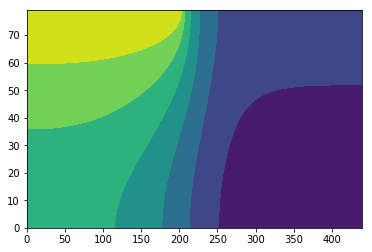

In [128]:
plt.contourf(np.flipud(h))